### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [4]:

data.isna().sum()
# data['car'].value_counts()
# data['Bar'].value_counts()
# data['CoffeeHouse'].value_counts()
# data['CarryAway'].value_counts()
# data['RestaurantLessThan20'].value_counts()
# data['Restaurant20To50'].value_counts()
# data['temperature'].value_counts()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
data = data.drop_duplicates()


In [6]:
data['car'].fillna('other', inplace=True)
data['Bar'].fillna('other', inplace=True)
data['CoffeeHouse'].fillna('other', inplace=True)
data['CarryAway'].fillna('other', inplace=True)
data['RestaurantLessThan20'].fillna('other', inplace=True)
data['Restaurant20To50'].fillna('other', inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
accepted_coupons = data[data['Y'] == 1]
rejected_coupons = data[data['Y'] == 0]
proportion_accepted = len(accepted_coupons) / len(data)
proportion_rejected = len(rejected_coupons) / len(data)
proportion_rejected
proportion_accepted

0.5675654242664552

5. Use a bar plot to visualize the `coupon` column.

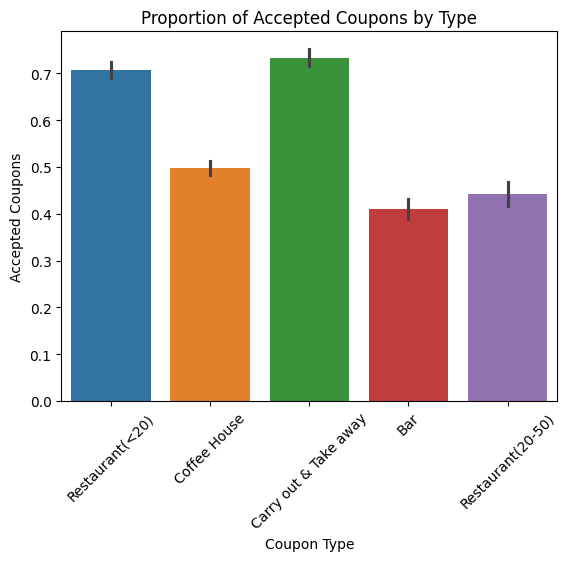

In [8]:
coupon_figure = sns.barplot(data=data, x='coupon', y='Y', hue='coupon')
coupon_figure.set_xticks(coupon_figure.get_xticks())
coupon_figure.set_xticklabels(coupon_figure.get_xticklabels(), rotation=45)
coupon_figure.set_title('Proportion of Accepted Coupons by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Accepted Coupons')
plt.show()

6. Use a histogram to visualize the temperature column.

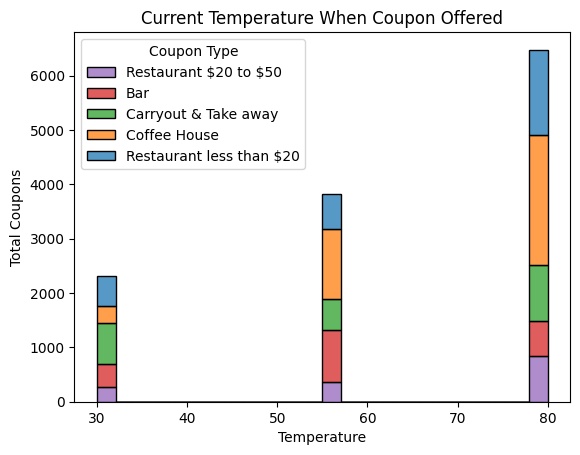

In [9]:
temperature_figure_total = sns.histplot(data=data, x='temperature', hue='coupon', multiple='stack')
temperature_figure_total.set_title('Current Temperature When Coupon Offered')
plt.xlabel('Temperature')
plt.ylabel('Total Coupons')
plt.legend(title='Coupon Type', loc='upper left', labels=['Restaurant \\$20 to $50', 'Bar', 'Carryout & Take away', 'Coffee House', 'Restaurant less than \\$20' ])

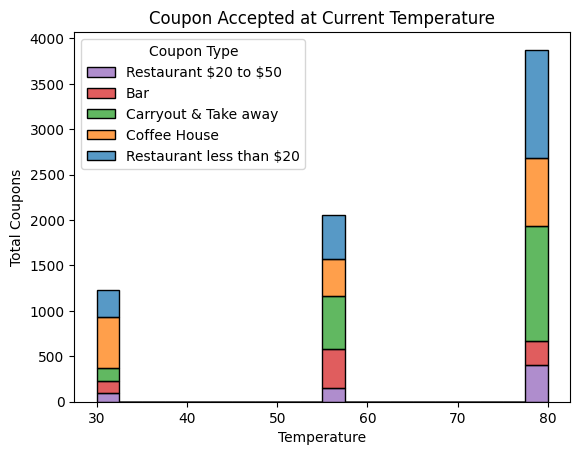

In [10]:
temperature_figure_accepted = sns.histplot(data=accepted_coupons, x='temperature', hue='coupon', multiple='stack')
temperature_figure_accepted.set_title('Coupon Accepted at Current Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Coupons')
plt.legend(title='Coupon Type', loc='upper left', labels=['Restaurant \\$20 to $50', 'Bar', 'Carryout & Take away', 'Coffee House', 'Restaurant less than \\$20'])

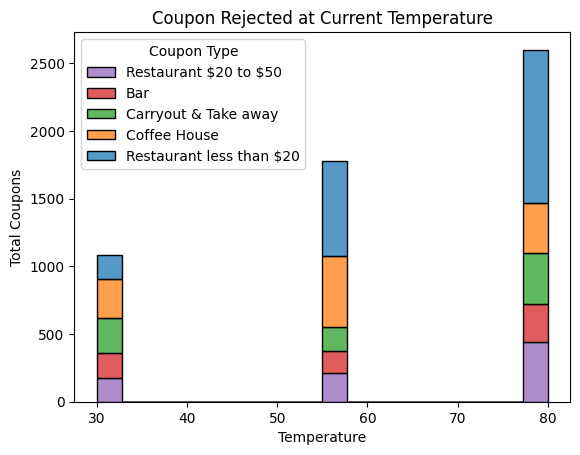

In [11]:
temperature_figure_rejected = sns.histplot(data=rejected_coupons, x='temperature', hue='coupon', multiple='stack')
temperature_figure_rejected.set_title('Coupon Rejected at Current Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Coupons')
plt.legend(title='Coupon Type', loc='upper left', labels=['Restaurant \\$20 to $50', 'Bar', 'Carryout & Take away', 'Coffee House', 'Restaurant less than \\$20'])

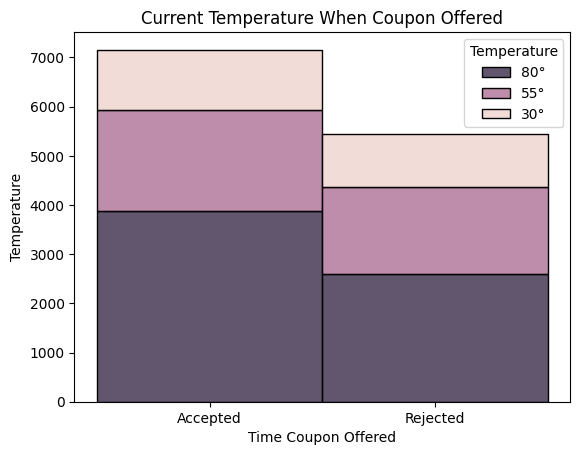

In [12]:
temperature_offered = data.replace({'Y': {1: 'Accepted', 0: 'Rejected'}})
temperature_figure_offered = sns.histplot(data=temperature_offered, x='Y', hue='temperature', multiple='stack')
temperature_figure_offered.set_title('Current Temperature When Coupon Offered')
plt.xlabel('Time Coupon Offered')
plt.ylabel('Temperature')
plt.legend(title='Temperature', loc='upper right', labels=['80°', '55°', '30°'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
only_bars = data[data['coupon']=='Bar'].drop(columns=['CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50'])
only_bars['Bar'].value_counts()


Bar
never    830
less1    563
1~3      397
4~8      150
gt8       49
other     21
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [14]:
bars_accepted = only_bars[only_bars['Y']==1]
bars_rejected = only_bars[only_bars['Y']==0]
bars_proportion_accepted = len(bars_accepted) / len(only_bars)
bars_proportion_rejected = len(bars_rejected) / len(only_bars)
bars_proportion_accepted

0.4099502487562189

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
bars_less_than_3 = bars_accepted[(bars_accepted['Bar'] == 'less1') + (bars_accepted['Bar'] == '1~3')]
bars_greater_than_3 = bars_accepted[(bars_accepted['Bar'] == '4~8') + (bars_accepted['Bar'] == 'gt8')]
proportion_bars_accepted_lt_3 = len(bars_less_than_3) / len(bars_greater_than_3)
proportion_bars_accepted_lt_3

bars_greater_than_3['Bar'].value_counts()

Bar
4~8    117
gt8     36
Name: count, dtype: int64

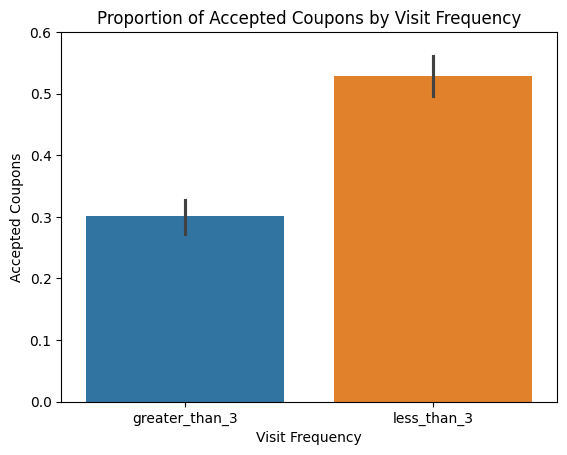

In [16]:
def less_or_greater_than_three(row):
    if row['Bar'] == 'less1' or row['Bar'] == '1~3':
        return 'less_than_3'
    else:
        return 'greater_than_3'
    
only_bars['ratio_bars'] = only_bars.apply(lambda row: less_or_greater_than_three(row), axis=1)

ratio_bars_figure = sns.barplot(data=only_bars, x='ratio_bars', y='Y', hue='ratio_bars')
ratio_bars_figure.set_yticks(np.arange(0,.7,.1))
ratio_bars_figure.set_title('Proportion of Accepted Coupons by Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Accepted Coupons')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0, 0.5, 'Accepted Coupons')

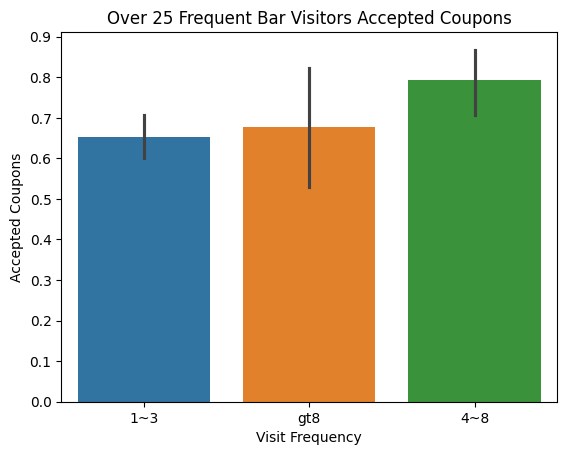

In [17]:
over_25_frequent = only_bars[(only_bars['age'] > '25') & (only_bars['Bar'] != 'less1') & (only_bars['Bar'] != 'never') & (only_bars['Bar'] != 'other')]
over_25_frequent_accepted = over_25_frequent[over_25_frequent['Y'] == 1]
over_25_frequent_rejected = over_25_frequent[over_25_frequent['Y'] == 0]
over_25_frequent_figure = sns.barplot(data=over_25_frequent, x='Bar', y='Y', hue='Bar')
over_25_frequent_figure.set_yticks(np.arange(0,1,.1))
over_25_frequent_figure.set_title('Over 25 Frequent Bar Visitors Accepted Coupons')
plt.xlabel('Visit Frequency')
plt.ylabel('Accepted Coupons')


1566
1996
430


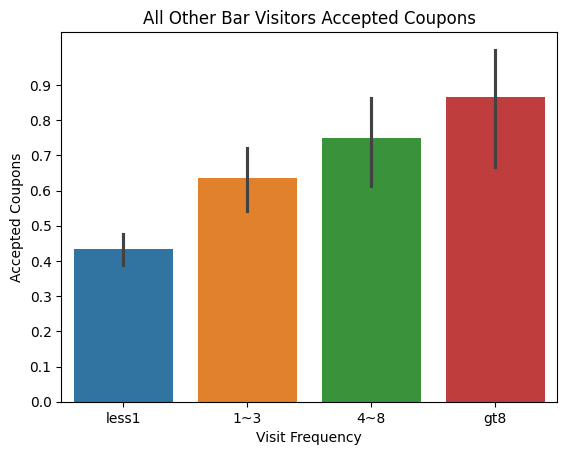

In [18]:
all_other_bar_goers = pd.concat([only_bars,over_25_frequent]).drop_duplicates(keep=False)
print(len(all_other_bar_goers))
print(len(only_bars.drop_duplicates(keep=False)))
print(len(over_25_frequent))

all_other_bar_goers = all_other_bar_goers.query('Bar != "never" and Bar != "other"')

all_other_bar_goers_accepted = all_other_bar_goers[all_other_bar_goers['Y'] == 1]
all_other_bar_goers_rejected = all_other_bar_goers[all_other_bar_goers['Y'] == 0]
all_other_bar_goers_figure = sns.barplot(data=all_other_bar_goers, x='Bar', y='Y', hue='Bar')
all_other_bar_goers_figure.set_yticks(np.arange(0,1,.1))
all_other_bar_goers_figure.set_title('All Other Bar Visitors Accepted Coupons')
plt.xlabel('Visit Frequency')
plt.ylabel('Accepted Coupons')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Text(0, 0.5, 'Accepted Coupons')

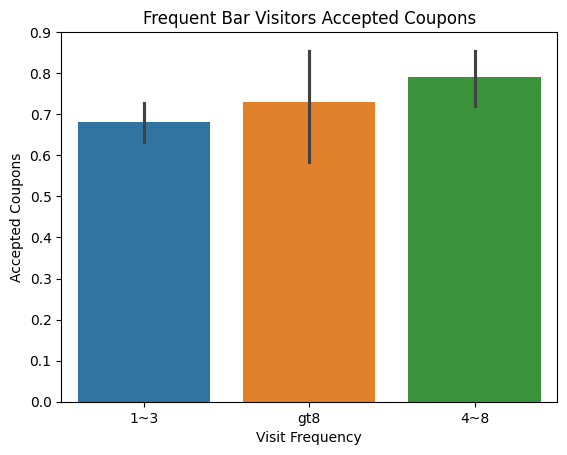

In [19]:
frequent_with_exceptions = only_bars[(only_bars['Bar'] != 'less1') & (only_bars['Bar'] != 'never') & (only_bars['Bar'] != 'other') & (only_bars['passanger'] != 'Kid(s)') & (only_bars['occupation'] != 'farming') & (only_bars['occupation'] != 'fishing') & (only_bars['occupation'] != 'farming')]
frequent_with_exceptions
frequent_with_exceptions_accepted = frequent_with_exceptions[frequent_with_exceptions['Y'] == 1]
frequent_with_exceptions_rejected = frequent_with_exceptions[frequent_with_exceptions['Y'] == 0]
frequent_with_exceptions_figure = sns.barplot(data=frequent_with_exceptions, x='Bar', y='Y', hue='Bar')
frequent_with_exceptions_figure.set_yticks(np.arange(0,1,.1))
frequent_with_exceptions_figure.set_title('Frequent Bar Visitors Accepted Coupons')
plt.xlabel('Visit Frequency')
plt.ylabel('Accepted Coupons')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   12610 non-null  object
 15  Bar                   12610 non-null  obj

C:\Users\jmart\AppData\Local\Temp\ipykernel_38468\3726652193.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  complex_relationships_figure.set_xticklabels(complex_relationships_figure.get_xticklabels(), rotation=45)


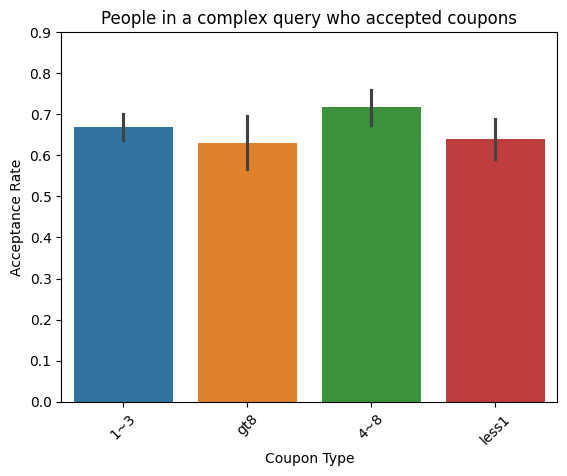

In [21]:
complex_bar_goers = only_bars.query('((Bar != "never" and Bar != "less1") and passanger != "Kids(s)" and maritalStatus != "Widowed") or ((Bar != "never" and Bar != "less1") and age < "30")')
cheap_restaurant_goers = data.query('(RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and (income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999")')
complex_relationships = pd.concat([complex_bar_goers, cheap_restaurant_goers]).drop_duplicates(keep=False)
complex_relationships = complex_relationships.query('Bar != "never" and Bar != "other"')
complex_relationships_accepted = complex_relationships[complex_relationships['Y'] == 1]
complex_relationships_rejected = complex_relationships[complex_relationships['Y'] == 0]
complex_relationships_figure = sns.barplot(data=complex_relationships, x='Bar', y='Y', hue='Bar') 
complex_relationships_figure.set_yticks(np.arange(0,1,.1))
complex_relationships_figure.set_title('People in a complex query who accepted coupons')
complex_relationships_figure.set_xticklabels(complex_relationships_figure.get_xticklabels(), rotation=45)
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Conclusions
Across all these queries, the likelihood of a driver who already frequents bars is more likely to accept a coupon to go to a bar. However, it looks like the more a driver frequents a bar the few coupons they will accepts. Perhaps this is because these drivers have a favorite bar they go to and coupons are for other bars.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Clean up the data
Removing measurements I'm not particularly interested in or curious about. This just makes the data set a bit easier to see what we're working with

In [22]:
limited_only_bars = only_bars.drop(columns=['weather', 'temperature', 'time', 'car', 'Bar', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'ratio_bars']).rename(columns={'Y': 'accepted'})
limited_only_bars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 9 to 12682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   destination     2010 non-null   object
 1   passanger       2010 non-null   object
 2   coupon          2010 non-null   object
 3   expiration      2010 non-null   object
 4   gender          2010 non-null   object
 5   age             2010 non-null   object
 6   maritalStatus   2010 non-null   object
 7   has_children    2010 non-null   int64 
 8   education       2010 non-null   object
 9   occupation      2010 non-null   object
 10  income          2010 non-null   object
 11  direction_same  2010 non-null   int64 
 12  direction_opp   2010 non-null   int64 
 13  accepted        2010 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 235.5+ KB


In [23]:
limited_only_bars.describe()

,has_children,direction_same,direction_opp,accepted
count,2010.000000,2010.000000,2010.000000,2010.000000
mean,0.433333,0.208955,0.791045,0.409950
std,0.495659,0.406664,0.406664,0.491947
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


The overall questions I'm curious about revolve around the factors that increase a driver's likelihood of accepting the coupon and driving more traffic / revenue to local businesses. Also, what factors can be used to limit the offerings to drivers who are unlikely to accept the coupons at that moment.
1. What factors reduce the likelihood of accapting a coupon? 
  - Passengers in the car?
  - Children either in the car or at home?
  - Marital status?
  - Distance from current location?
2. What factors increase the likelihood of accepting the coupon?
  - Passengers in the car?
  - Distance from the current location?
  - Destination?

I'm going to change some of the columns to read better in a visual analysis.

In [24]:
limited_only_bars.replace({'accepted': {True: 'Accepted', False: 'Rejected'},'direction_same': {1: True, 0: False}, 'direction_opp': {1: True, 0: False},'has_children': {1: True, 0: False}}, inplace=True)
limited_only_bars

,destination,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,direction_same,direction_opp,accepted
9,No Urgent Place,Kid(s),Bar,1d,Female,21,Unmarried partner,True,Some college - no degree,Unemployed,$37500 - $49999,False,True,0
13,Home,Alone,Bar,1d,Female,21,Unmarried partner,True,Some college - no degree,Unemployed,$37500 - $49999,True,False,1
17,Work,Alone,Bar,1d,Female,21,Unmarried partner,True,Some college - no degree,Unemployed,$37500 - $49999,False,True,0
24,No Urgent Place,Friend(s),Bar,1d,Male,21,Single,False,Bachelors degree,Architecture & Engineering,$62500 - $74999,False,True,1
35,Home,Alone,Bar,1d,Male,21,Single,False,Bachelors degree,Architecture & Engineering,$62500 - $74999,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Bar,1d,Male,26,Single,False,Bachelors degree,Sales & Related,$75000 - $87499,False,True,0
12664,No Urgent Place,Friend(s),Bar,2h,Male,26,Single,False,Bachelors degree,Sales & Related,$75000 - $87499,False,True,0
12667,No Urgent Place,Alone,Bar,1d,Male,26,Single,False,Bachelors degree,Sales & Related,$75000 - $87499,False,True,0
12670,No Urgent Place,Partner,Bar,2h,Male,26,Single,False,Bachelors degree,Sales & Related,$75000 - $87499,False,True,0


First, I'll look at a simple comparison across this narrower set of data. Acceptance vs. rejection of the coupon offered.

Text(0.5, 1.0, 'Accepted vs Rejected Coupons')

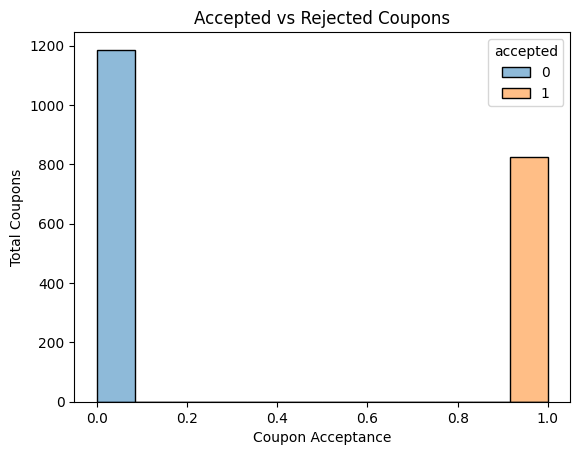

In [25]:
sns.histplot(data=limited_only_bars, x='accepted', hue='accepted')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Total Coupons')
plt.title('Accepted vs Rejected Coupons')

It appears that overall, drivers are more likely to reject a coupon than to accept it. Let's dig into the data to see what's influencing.

Starting with age.

Text(0.5, 1.0, 'Coupon Acceptance by Age')

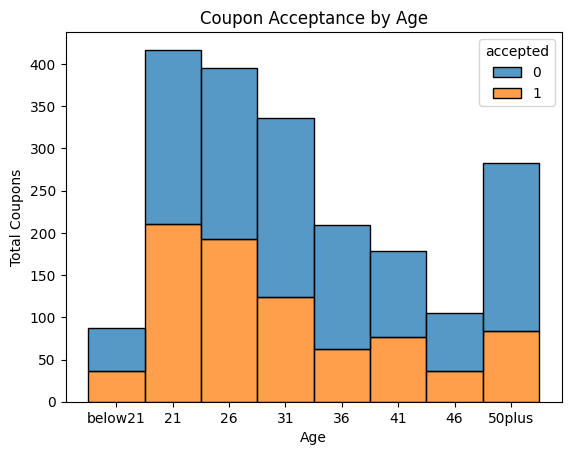

In [31]:
limited_only_bars['age'] = pd.Categorical(limited_only_bars['age'], categories=['below21', '21', '26', '31', '36', '41', '46', '50plus'], ordered=True)
sns.histplot(data=limited_only_bars, x='age', hue='accepted', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Total Coupons')
plt.title('Coupon Acceptance by Age')

Seemingly stereotypical, but it looks like the acceptance rate starts high but drops off as the driver ages, with a few peaks in mid-life. The rejection rates increase as the person ages.

Let's look at these ages and compare other factors, starting with marital status.

Text(0.5, 0, 'Age')

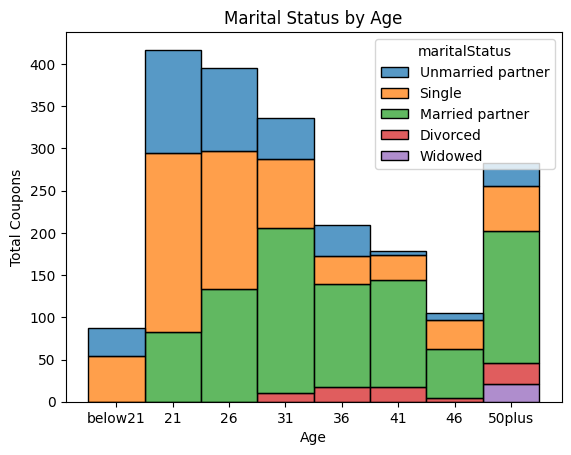

In [41]:
sns.histplot(data=limited_only_bars, x='age', hue='maritalStatus', multiple='stack')
plt.ylabel('Total Coupons')
plt.title('Marital Status by Age')
plt.xlabel('Age')

There's certainly a visual correlation to the increase in rejection rates as the driver is in some sort of relationship.

What about children?

Text(0.5, 0, 'Age')

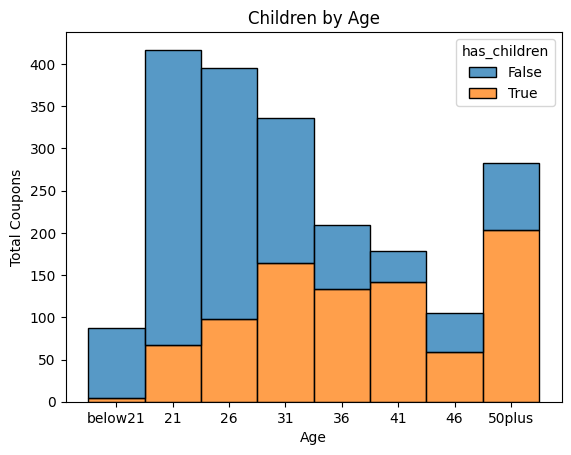

In [43]:
sns.histplot(data=limited_only_bars, x='age', hue='has_children', multiple='stack')
plt.ylabel('Total Coupons')
plt.title('Children by Age')
plt.xlabel('Age')

Again, as the driver has children, they are likely to reject these coupons. The exception appears to be as they age, this is likely because their children are grown. 

Let's look at passengers.

<Axes: xlabel='passanger', ylabel='Count'>

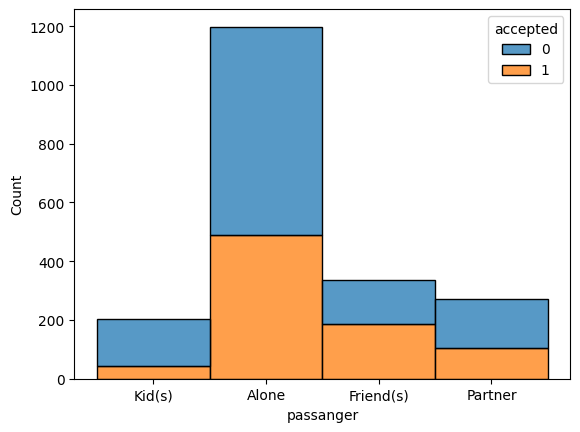

In [46]:
sns.histplot(data=limited_only_bars, x='passanger', hue='accepted', multiple='stack')

People driving alone are more likely to reject a coupon to go to a bar. However, if they were going to accept a coupon, those driving alone are more likely to do so than those who would have with passengers. Those with kids in the car are far less likely to accept a coupon, but some still do.

Let's look at distance and direction now.

<Axes: xlabel='direction_same', ylabel='Count'>

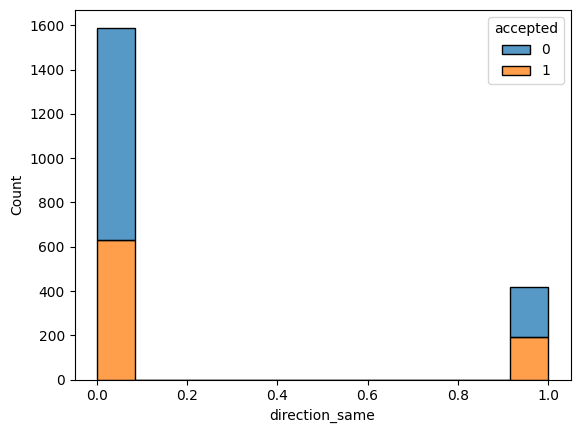

In [49]:
sns.histplot(data=limited_only_bars, x='direction_same', hue='accepted', multiple='stack')

It looks like the driver is more likely to accept a coupon to a bar that is in the opposite direction than they are driving. However, the majority of coupons offered are in the opposite direction of the driver's destination.